In [2]:
import pandas as pd
mpg = pd.read_csv('mpg.csv')

<Axes: xlabel='displ', ylabel='hwy'>

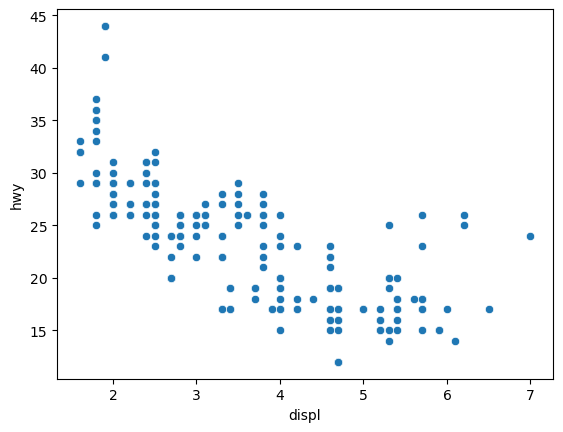

In [4]:
# 산점도 만들기 
import seaborn as sns
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')

[(3.0, 6.0)]

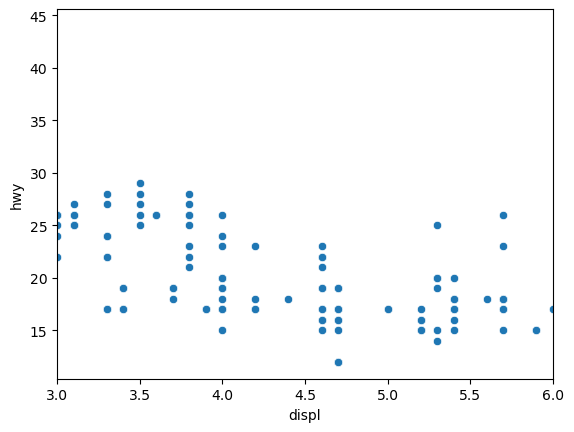

In [8]:
# x축 범위 3-6으로 제한
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy') \
    .set(xlim = [3, 6])

[(3.0, 6.0), (10.0, 30.0)]

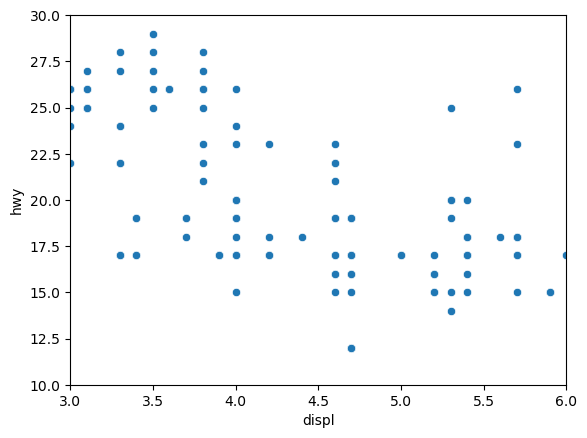

In [10]:
# x축 범위 3-6, y축 범위 10~30으로 제한 
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy') \
    .set(xlim = [3, 6], ylim = [10, 30])

<Axes: xlabel='displ', ylabel='hwy'>

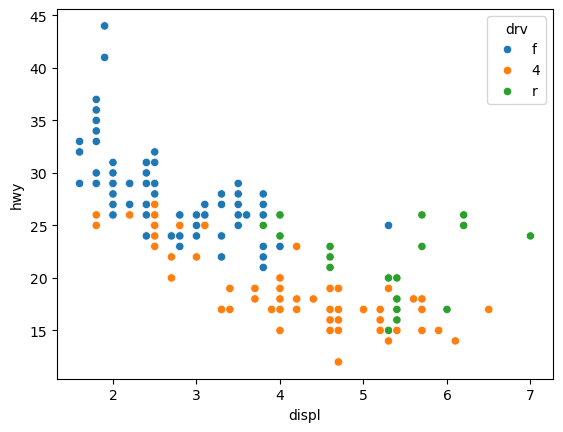

In [18]:
# 종류별로 표식 색깔 바꾸기 
# drv 별로 표시 색깔 다르게 표현 
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')

<Axes: xlabel='cty', ylabel='hwy'>

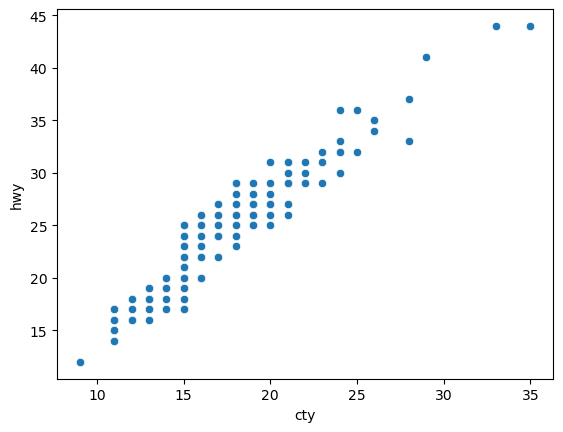

In [20]:
# 혼자서 해보기
sns.scatterplot(data = mpg, x = 'cty', y = 'hwy')

In [22]:
midwest = pd.read_csv('midwest.csv')

[(0.0, 500000.0), (0.0, 10000.0)]

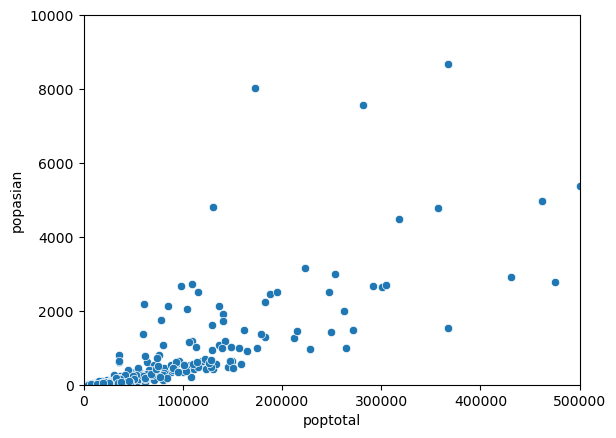

In [26]:
sns.scatterplot(data = midwest, x = 'poptotal', y = 'popasian') \
    .set(xlim = [0, 500000], ylim = [0, 10000])

In [48]:
# drv 별 hwy 평균
df_mpg = mpg.groupby('drv', as_index = False) \
    .agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


<Axes: xlabel='drv', ylabel='mean_hwy'>

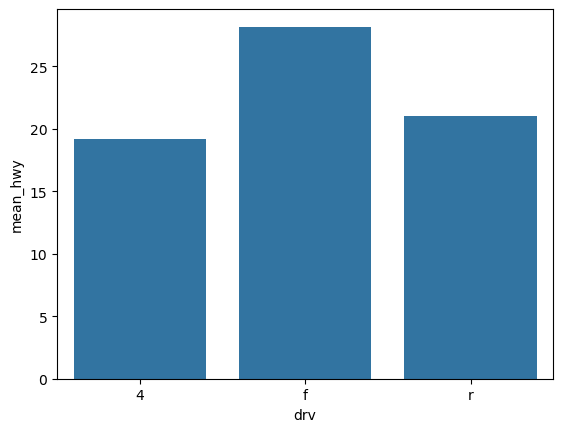

In [50]:
# 막대 그래프 
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

<Axes: xlabel='drv', ylabel='mean_hwy'>

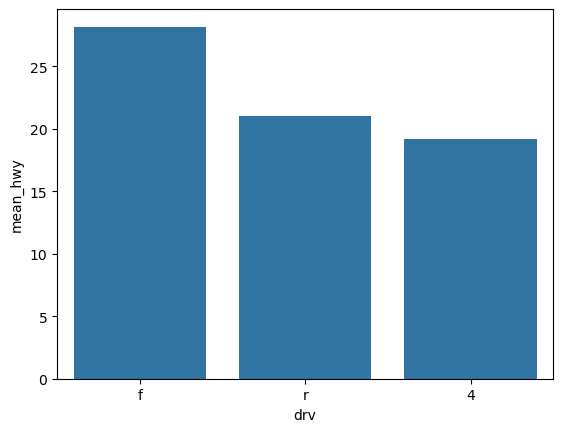

In [52]:
# 크기 순으로 정렬하기 
df_mpg = df_mpg.sort_values('mean_hwy', ascending = False)

# 막대 그래프 만들기
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

In [58]:
# 집단별 빈도 그래프
df_mpg = mpg.groupby('drv', as_index = False) \
    .agg(n = ('hwy', 'count'))

df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


<Axes: xlabel='drv', ylabel='n'>

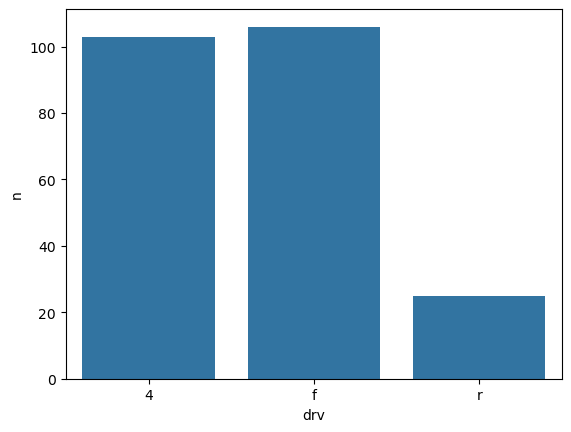

In [60]:
# 막대 그래프 만들기
sns.barplot(data = df_mpg, x = 'drv', y = 'n')

<Axes: xlabel='drv', ylabel='count'>

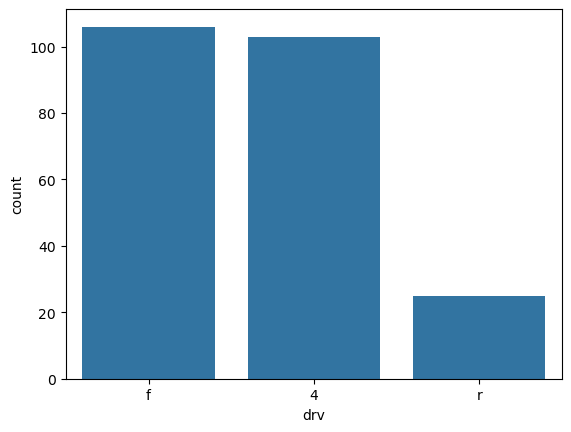

In [62]:
# countplot을 사용하면 groupby와 agg를 이용해 집단별 빈도표를 만드는 대신 원자료를 이용해 빈도 막대 그래프를 만듦 
sns.countplot(data = mpg, x = 'drv')

In [64]:
# 값의 순서 알기
mpg['drv'].unique()

array(['f', '4', 'r'], dtype=object)

In [66]:
# groupby로 하면 알파벳 순서로 정렬됨
df_mpg['drv'].unique()

array(['4', 'f', 'r'], dtype=object)

<Axes: xlabel='drv', ylabel='count'>

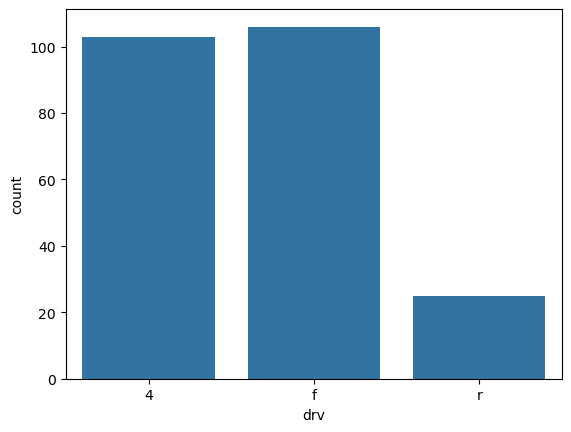

In [68]:
# 4 f r 순으로 정렬
sns.countplot(data = mpg, x = 'drv', order = ['4', 'f', 'r'])

In [70]:
# drv 값을 빈도가 높은 순으로 출력
mpg['drv'].value_counts().index

Index(['f', '4', 'r'], dtype='object', name='drv')

<Axes: xlabel='drv', ylabel='count'>

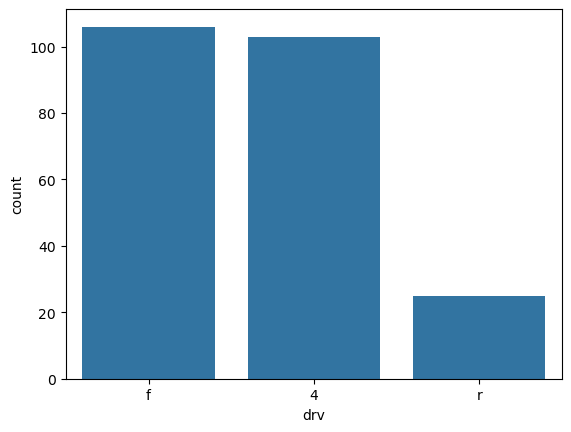

In [72]:
#  drv 빈도 높은 순으로 막대 정렬
sns.countplot(data = mpg, x = 'drv',
              order = mpg['drv'].value_counts().index)

<Axes: xlabel='manufacturer', ylabel='mean_cty'>

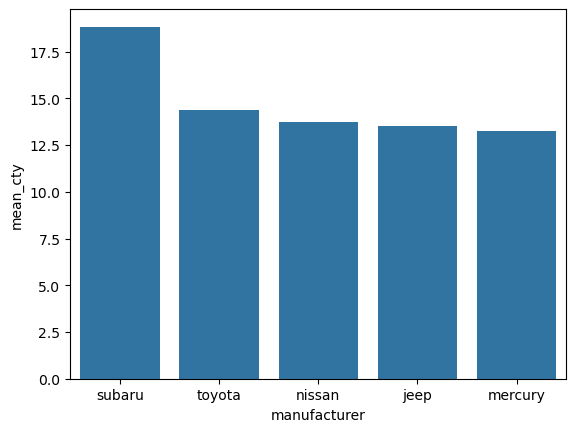

In [84]:
# 혼자서 해보기

# suv 차종
suv_mpg = mpg.query('category == "suv"')

suv_plot = suv_mpg.groupby('manufacturer') \
    .agg(mean_cty = ('cty', 'mean')) \
    .sort_values('mean_cty', ascending = False) \
    .head() \

sns.barplot(data = suv_plot, x = 'manufacturer', y = 'mean_cty')

<Axes: xlabel='category', ylabel='n'>

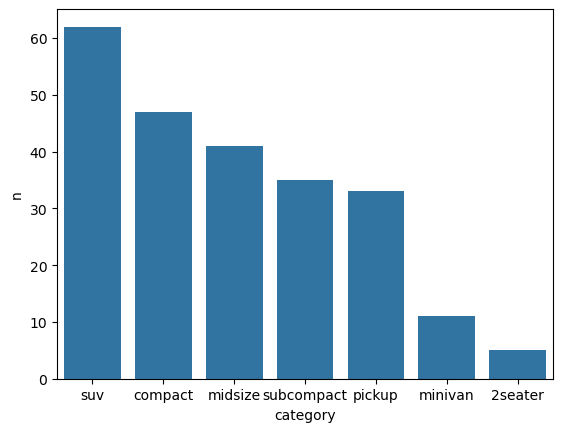

In [100]:
# 빈도가 높은 순으로 정렬
suv_sort = mpg.groupby('category', as_index = False) \
    .agg(n = ('category', 'count')) \
    .sort_values('n', ascending = False)

sns.barplot(data = suv_sort, x = 'category', y = 'n')

In [104]:
economics = pd.read_csv('economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


<Axes: xlabel='date', ylabel='unemploy'>

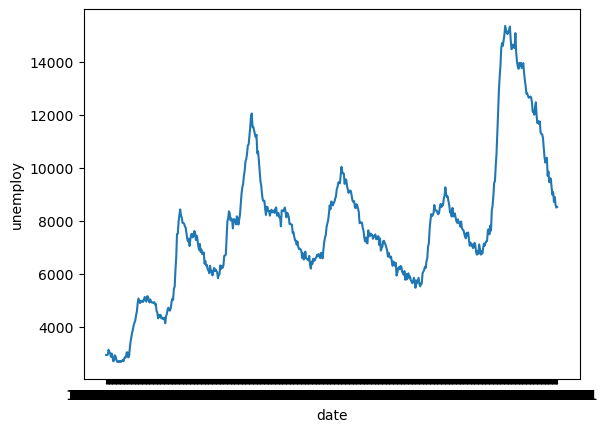

In [106]:
# 선 그래프 만들기
sns.lineplot(data = economics, x = 'date', y = 'unemploy')

In [110]:
# 날짜 시간 타입 변수 만들기
economics['date2'] = pd.to_datetime(economics['date'])

# 변수 타입 확인
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [114]:
economics[['date', 'date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [118]:
# 연 추출
print(economics['date2'].dt.year)

# 월 추출
print(economics['date2'].dt.month)

# 일 추출 
print(economics['date2'].dt.day)

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int32
0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int32
0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int32


In [120]:
# 연도 변수 만들기
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<Axes: xlabel='year', ylabel='unemploy'>

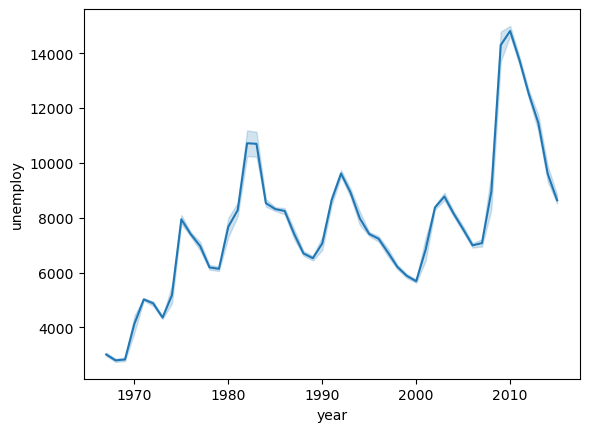

In [122]:
# x축에 연도 표시
sns.lineplot(data = economics, x = 'year', y = 'unemploy')

<Axes: xlabel='year', ylabel='unemploy'>

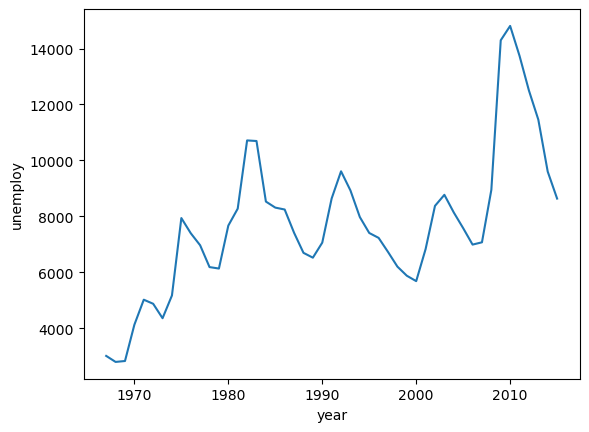

In [124]:
# 신뢰구간 표시하지 않음 
sns.lineplot(data = economics, x = 'year', y = 'unemploy', errorbar = None)

<Axes: xlabel='year', ylabel='psavert'>

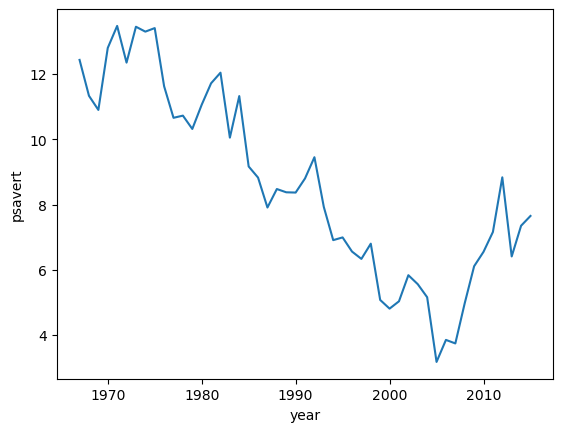

In [126]:
# 혼자서 해보기

# 연도별 개인 저축률 변화 
sns.lineplot(data = economics, x = 'year', y = 'psavert', errorbar = None)

In [128]:
# 월 변수 만들기
economics['month'] = economics['date2'].dt.month
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year,month
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967,7
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967,8
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967,9
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967,10
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967,11


<Axes: xlabel='month', ylabel='psavert'>

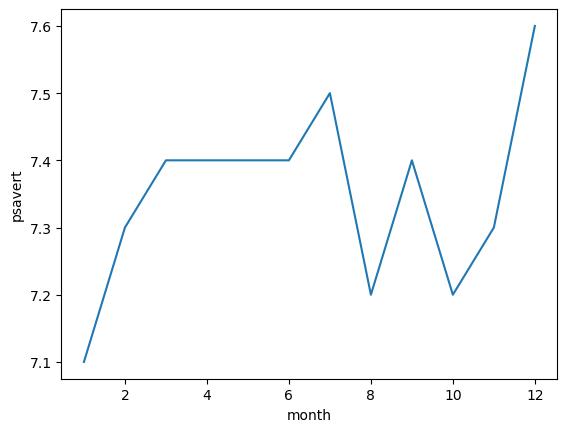

In [130]:
# 2024년 데이터만 추출하여 선 그래프 만들기
economics_2024 = economics.query('year == 2014') 

sns.lineplot(data = economics_2024, x = 'month', y = 'psavert', errorbar = None)

<Axes: xlabel='drv', ylabel='hwy'>

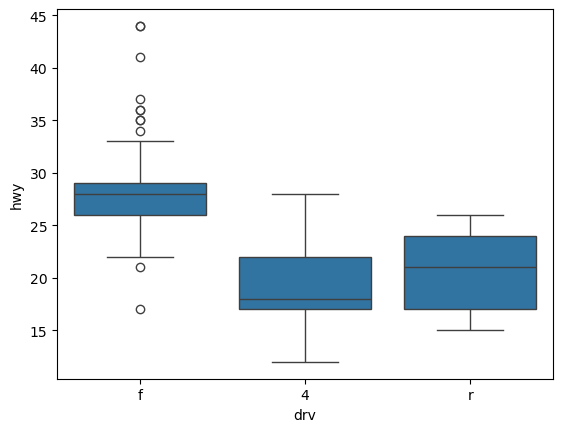

In [132]:
# 상자 그림 만들기
sns.boxplot(data = mpg, x = 'drv', y = 'hwy')

<Axes: xlabel='category', ylabel='cty'>

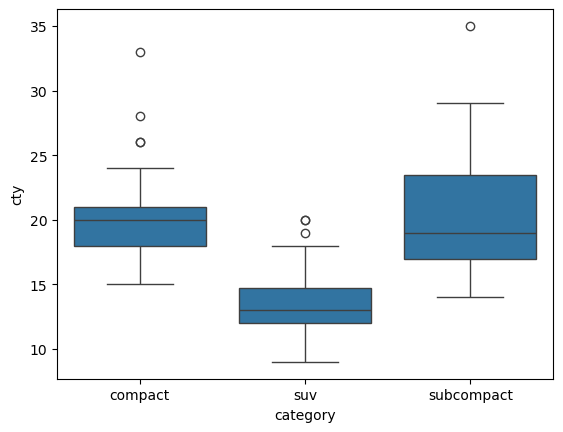

In [134]:
# 혼자서 해보기
mpg_new = mpg.query('category in ["compact", "subcompact", "suv"]')

sns.boxplot(data = mpg_new, x = 'category', y = 'cty')